In [1]:
#Import the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
#Import the dataset
cardiac_data = pd.read_csv('cardiac.csv')

In [3]:
cardiac_data

,caseno,age,weight,gender,fitness_score,cardiac_condition
0,1,37,70.47,Male,55.79,Absent
1,2,73,50.34,Female,35.00,Absent
2,3,46,87.65,Male,42.93,Present
3,4,36,89.80,Female,28.30,Present
4,5,34,103.02,Male,40.56,Absent
...,...,...,...,...,...,...
95,96,42,111.98,Male,33.73,Present
96,97,43,88.07,Male,49.22,Present
97,98,45,94.07,Male,41.97,Present
98,99,58,97.46,Male,35.20,Present


## EDA

In [4]:
#Replace the Column gender and Cardiac into numerical value 0 and 1
cardiac_data['gender'] = cardiac_data['gender'].replace({'Male': 1, 'Female': 0})
cardiac_data['cardiac_condition'] = cardiac_data['cardiac_condition'].replace({'Absent': 0, 'Present': 1})

In [5]:
#Drop the caseno column this is an identifier this shows the number of rows and putting no effect on the predictive value

In [6]:
cardiac_data = cardiac_data.drop("caseno", axis=1)

In [7]:
cardiac_data

,age,weight,gender,fitness_score,cardiac_condition
0,37,70.47,1,55.79,0
1,73,50.34,0,35.00,0
2,46,87.65,1,42.93,1
3,36,89.80,0,28.30,1
4,34,103.02,1,40.56,0
...,...,...,...,...,...
95,42,111.98,1,33.73,1
96,43,88.07,1,49.22,1
97,45,94.07,1,41.97,1
98,58,97.46,1,35.20,1


In [8]:
#Describe the data 
cardiac_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,100.0,41.1000,9.142530,30.00,34.0000,39.00,45.2500,74.00
weight,100.0,79.6603,15.089842,50.00,69.7325,79.24,89.9125,115.42
gender,100.0,0.6300,0.485237,0.00,0.0000,1.00,1.0000,1.00
fitness_score,100.0,43.6298,8.571306,27.35,36.5950,42.73,49.2650,62.50
cardiac_condition,100.0,0.3500,0.479372,0.00,0.0000,0.00,1.0000,1.00


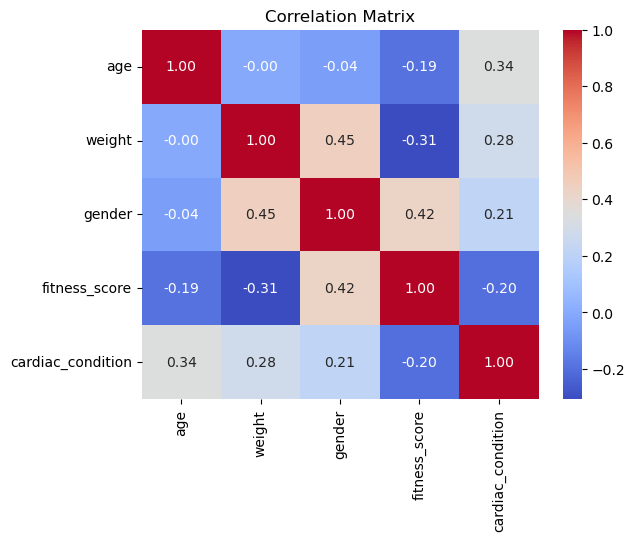

In [9]:
#Check the correlation between the column
corr_matrix = cardiac_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


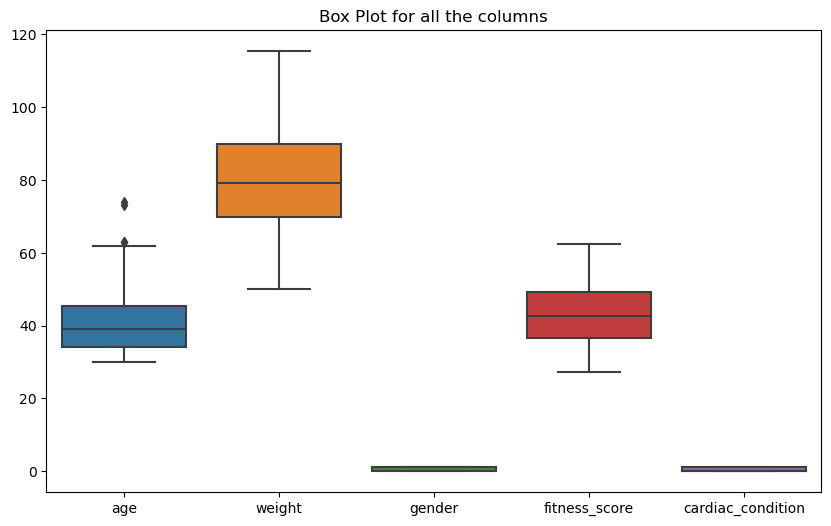

In [10]:
# Box plot to check the outliers
plt.figure(figsize=(10, 6))
sns.boxplot(cardiac_data)
plt.title('Box Plot for all the columns')
plt.show()

In [11]:
# Divide the data into independent and dependent variables
x = cardiac_data.iloc[:,:-1].values
y = cardiac_data.iloc[:,-1].values

In [12]:
# Set the random seed based on student number
student_number = 22207406
np.random.seed(student_number)

In [13]:
#Splitting the data into Train and test
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=student_number)

In [14]:
#Preprocessing the data using standard scaler, which is used for the better model performance 
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [15]:
#Fit a logistic Regression model
fit = sm.Logit(y_train, sm.add_constant(x_train)).fit()

Optimization terminated successfully.
         Current function value: 0.521635
         Iterations 6


In [16]:
#Print the summary of the model
print(fit.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   70
Model:                          Logit   Df Residuals:                       65
Method:                           MLE   Df Model:                            4
Date:                Sun, 31 Dec 2023   Pseudo R-squ.:                  0.1886
Time:                        11:05:48   Log-Likelihood:                -36.514
converged:                       True   LL-Null:                       -45.004
Covariance Type:            nonrobust   LLR p-value:                  0.001951
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8505      0.306     -2.784      0.005      -1.449      -0.252
x1             0.6373      0.284      2.241      0.025       0.080       1.195
x2             0.1510      0.396      0.382      0.7

In [17]:
#Only x1 is significant if aplha = 0.05

In [18]:
#stats model deos not produce the log odds
#author can produce the log odds manually
np.exp(fit.params)

array([0.42718283, 1.89136261, 1.16297338, 2.23675824, 0.43200253])

In [19]:
# Wald test

In [20]:
#The Wald test is a statistical test used in logistic regression to examine the significance of individual coefficients (parameters) associated with predictor variables.
#wald test to test the null hypothesis that the regression coeffcients for predictors

In [21]:
fit.wald_test("(x1=0, x2=0, x3=0,x4=0)")

C:\Users\415vi\anaconda3\Lib\site-packages\statsmodels\base\model.py:1889: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(


<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=[[12.20782807]], p-value=0.01587089849297628, df_denom=4>

In [22]:
# evalute a model predictive ability

In [23]:
predicted_probab = fit.predict(sm.add_constant(x_test))
y_pred = [1 if x>0.5 else 0 for x in predicted_probab]

In [24]:
print(y_pred)

[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0]


In [25]:
print(predicted_probab)

[0.29222505 0.61170703 0.15134164 0.2381881  0.25895539 0.42667693
 0.39742197 0.47663595 0.47931629 0.92639355 0.37999515 0.4374947
 0.88493059 0.10950649 0.11782524 0.35823186 0.06424333 0.42098657
 0.45948051 0.68822999 0.71101028 0.48950813 0.28369903 0.14363243
 0.62600314 0.58244009 0.39072352 0.13069174 0.29714622 0.15057443]


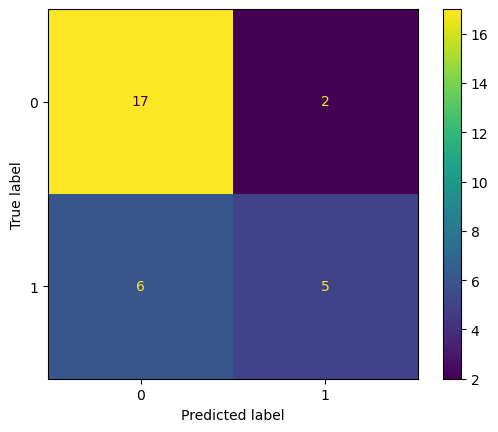

In [26]:
#Confusion Matrix
Con_matrix = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

In [27]:
#Print the summary of the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.89      0.81        19
           1       0.71      0.45      0.56        11

    accuracy                           0.73        30
   macro avg       0.73      0.67      0.68        30
weighted avg       0.73      0.73      0.72        30



In [28]:
#balanced-accuracy_score
balanced_accuracy_score(y_test, y_pred)

0.6746411483253588

In [29]:
#Accuracy of the model
accuracy_score(y_test, y_pred)

0.7333333333333333